 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

# Playing with basic supervised and unsupervised tools in Scikit-learn

This notebook is using one of the basic datasets in Machine Learning, called Iris. The ML algorithms used include: Naive Bayes Classification, Support Vector Machine (SVM) and KMeans.

# Load the dataset

In [1]:
%matplotlib inline
import pandas

# Load the Iris dataset containing data for 150 different flowers
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pandas.read_csv(url, names=names)

# Looka at a few lines of the dataset
print(type(dataset))
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
   sepal-length  sepal-width  petal-length  petal-width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


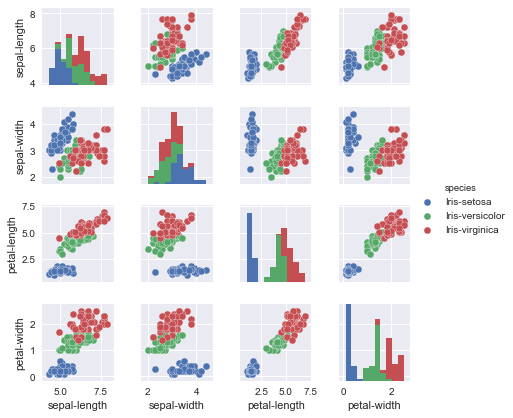

In [2]:
# Visualise the data with Seaborn, having the 'species' feature in mind
# Useful to spot relationships between some variables (eg. the petal_width seems correlated with the petal_length)
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(dataset, hue='species', size=1.5);

# A similar figure could be plotted with pandas.plotting.scatter_matrix

In [3]:
""" Data preparation """

from sklearn.model_selection import train_test_split

# Store the features in X, and the output class in y
X = dataset.values[:,:4]
y = dataset.values[:,4]

# Set a fixed seed so results are compared on the same subset of samples
seed = 7
scoring = 'accuracy'
test_size = 0.2

# Split the samples into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


# Naive Bayes Classification

In this part let's try out some ML algorithms to predict the class of a flower, based on its 4 features.
The Naive Bayes is the simplest classification algorithm, which doesn't require any input parameters, and is usually used to provide quick results, although its accuracy could be lower than more complex classification algorithms.

In [4]:
""" Apply Naive Bayes """

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Fit a Gaussian model to the training data set and make a prediction on the test set.
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

# Evaluate the fit using 'accuracy_score'
print("Naive Bayes accuracy: {0:.5f}".format(accuracy_score(y_test, y_model)))

Naive Bayes accuracy: 0.83333


The Naive Bayes would provide pretty high accuracy on simple datasets, as Iris.

# Support Vector Machine (SVM) classification

In [5]:
from sklearn import model_selection
from sklearn.svm import SVC

# Just to get the number of training samples and the number of features 
n_samples, n_features = X_train.shape
print("Number of training samples: {}".format(n_samples))
print("Number of features: {}".format(n_features))

Number of training samples: 120
Number of features: 4


In [9]:
# Use SVM for supervised learning, and 10-fold cross validation to estimate accurracy. 
# A cross-validation is useful in small datasets, as it validates the model on the training set. 
# Evaluating the model using the test set is used as a second step.
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = SVC()
validation_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("Cross-validation accuracy: {0:.5f}".format(validation_results.mean()))

# Now apply the model to the training data and evaluate it on the test data
# C - regularisation parameter

svc_model = SVC(gamma=0.001, C=10., kernel='rbf')
svc_fit = svc_model.fit(X_train, y_train)
print("Test score: {0:.5f}".format(svc_fit.score(X_test, y_test)))

Cross-validation accuracy: 0.99167
Test score: 0.83333


Why is the corss-validation accuracy much larger than the test score?

In [7]:
# Make a prediction on the test set and print the predictions and actual values for each sample in the set
predicted = svc_model.predict(X_test)
print("%s    %18s   %15s" % ("X sample", "predicted", "actual"))
for x_sample, pred, actual in zip(X_test, predicted, y_test):
    correct = "True" if pred == actual else "False"
    print("{0:20s} {1:20s} {2:20s} {3:20s}".format(str(x_sample), pred, actual, correct))

X sample             predicted            actual
[5.9 3.0 5.1 1.8]    Iris-virginica       Iris-virginica       True                
[5.4 3.0 4.5 1.5]    Iris-versicolor      Iris-versicolor      True                
[5.0 3.5 1.3 0.3]    Iris-setosa          Iris-setosa          True                
[5.6 3.0 4.5 1.5]    Iris-versicolor      Iris-versicolor      True                
[4.9 2.5 4.5 1.7]    Iris-versicolor      Iris-virginica       False               
[4.5 2.3 1.3 0.3]    Iris-setosa          Iris-setosa          True                
[6.9 3.1 4.9 1.5]    Iris-virginica       Iris-versicolor      False               
[5.6 2.7 4.2 1.3]    Iris-versicolor      Iris-versicolor      True                
[4.8 3.4 1.6 0.2]    Iris-setosa          Iris-setosa          True                
[6.4 3.2 4.5 1.5]    Iris-versicolor      Iris-versicolor      True                
[6.7 3.0 5.0 1.7]    Iris-virginica       Iris-versicolor      False               
[6.0 3.4 4.5 1.6]    Iris-v